In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Importing the dataset and basic df analysis
df = pd.read_csv(r'aerofit_treadmill.csv')

In [3]:
# first few rows of the dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
# Shape of dataset
df.shape

(180, 9)

In [5]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
# statistics of the numerical columns
df.describe(include="all").T.round(1)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,KP281,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


In [7]:
# 
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df.Education.value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [9]:
df.Age.value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [10]:
df.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [11]:
categorical_cols = ['Product', 'Gender', 'MaritalStatus']
df[categorical_cols] = df[categorical_cols].astype('category')

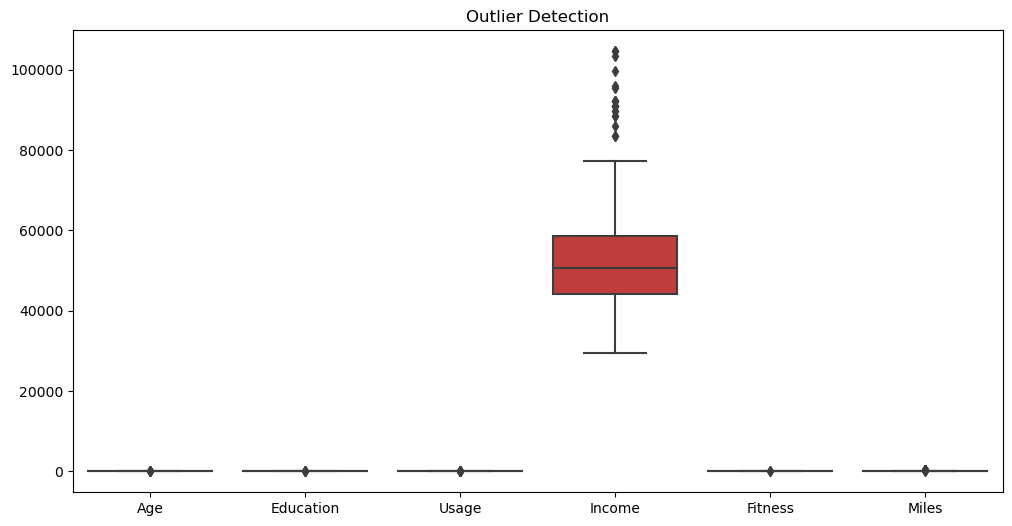

In [12]:
# Detecting Outliers
# identify and handle outliers using box plots
numeric_cols = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Outlier Detection")
plt.show()

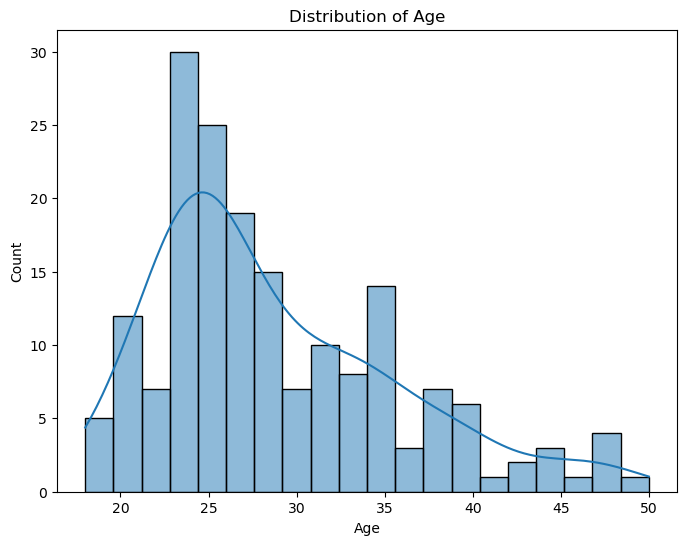

In [13]:
# Visual Analysis - Univariate & Bivariate
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title("Distribution of Age")
plt.show()

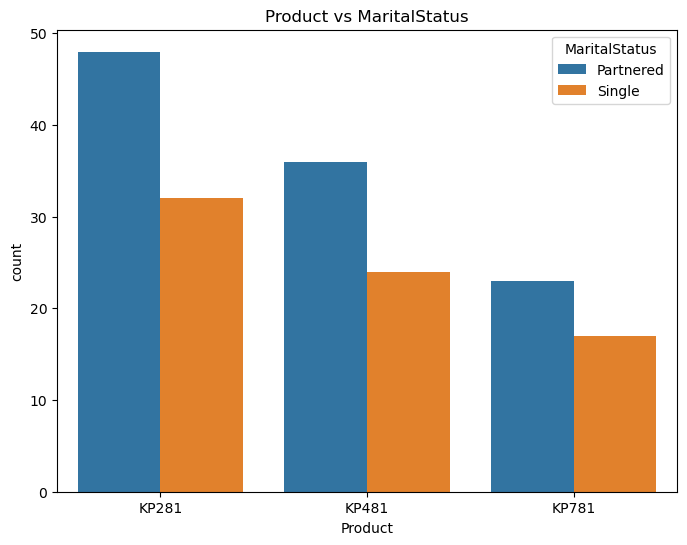

In [14]:
# Countplot for Product vs MaritalStatus
plt.figure(figsize=(8, 6))
sns.countplot(x="Product", hue='MaritalStatus', data=df)
plt.title("Product vs MaritalStatus")
plt.show()


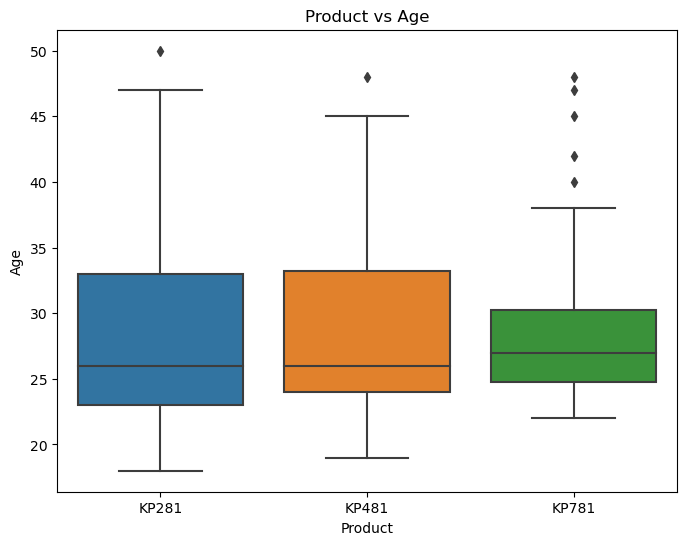

In [15]:
# Boxplot of Product vs Age
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Product', y='Age')
plt.title("Product vs Age")
plt.show()

In [16]:
# Representing marginal probability
# Marginal probabilities of purchasing each product
marginal_prob = pd.crosstab(index=df['Product'], columns='count', normalize=True)
print("Marginal Probability:")
print(marginal_prob)

Marginal Probability:
col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


In [17]:
# Correlation Analysis
# correlation matrix
corr = df.corr()

C:\Users\rahul\AppData\Local\Temp\ipykernel_10748\2035915871.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


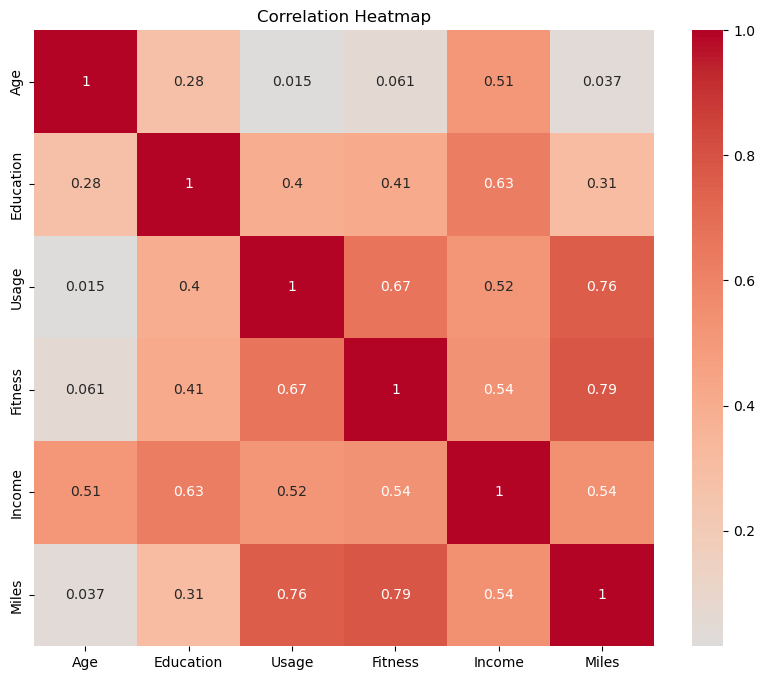

In [18]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

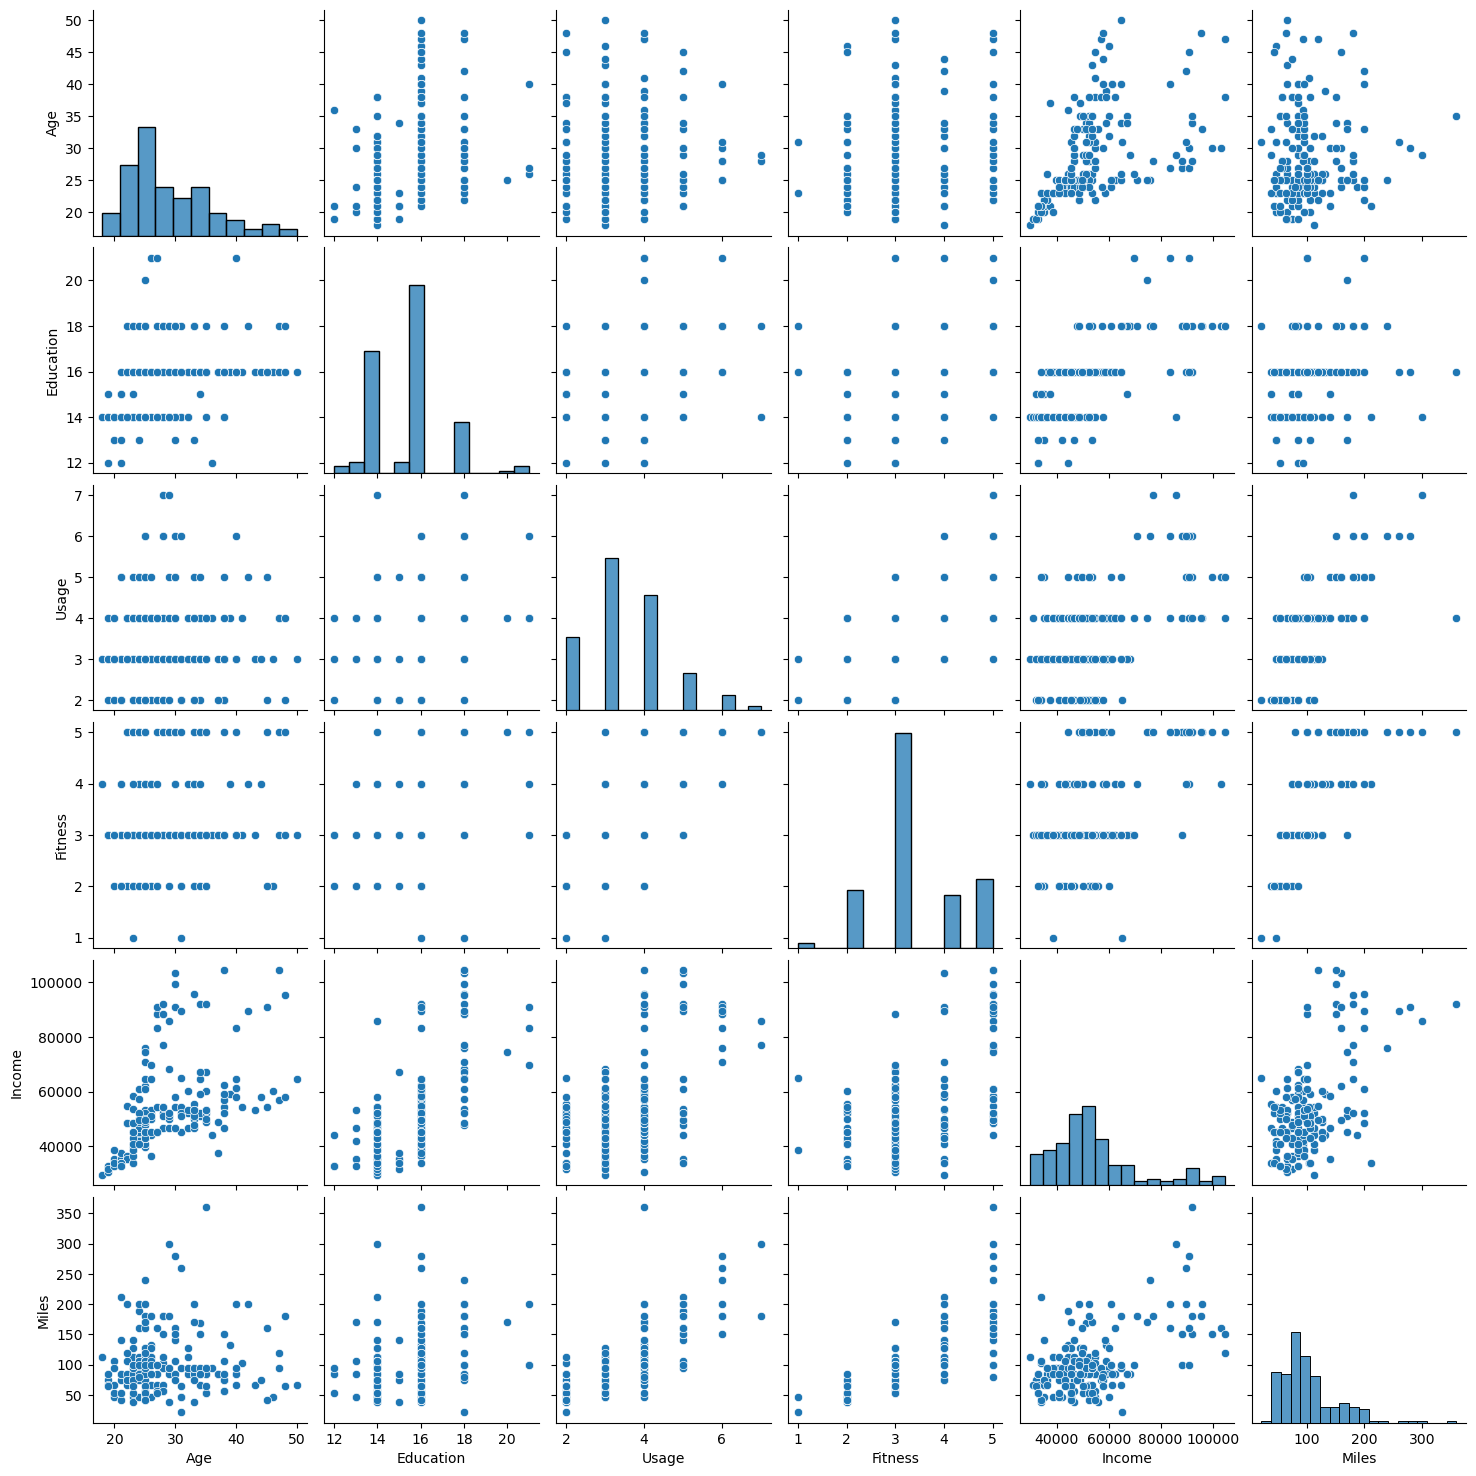

In [19]:
# Pairplot
sns.pairplot(df)

In [20]:
# Calculating conditional probability
df.std()

C:\Users\rahul\AppData\Local\Temp\ipykernel_10748\3187971767.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64

In [21]:
# Median
df.median()

C:\Users\rahul\AppData\Local\Temp\ipykernel_10748\3213049308.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [22]:
# Mean
df.mean()

C:\Users\rahul\AppData\Local\Temp\ipykernel_10748\2486691740.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [23]:
age_diff = df['Age'].mean() - df['Age'].median()
print(f'Difference between mean and median of Age: {age_diff}')

Difference between mean and median of Age: 2.788888888888888


In [24]:
# Gender for each Product
conditional_prob_gender = pd.crosstab(index=df['Product'], columns=df['Gender'], normalize='index')
print("Conditional Probability (Gender):")
print(conditional_prob_gender)

Conditional Probability (Gender):
Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000


In [25]:
# Customer Profiling - Categorization of users
X = df[['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']]

In [26]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
# Generating recommendations and actionable insights
# Customer profiling insights
for cluster in range(3):
    cluster_df = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster} has {len(cluster_df)} customers.")
    print(f"Average age: {cluster_df['Age'].mean():.2f}")
    print(f"Average income: ${cluster_df['Income'].mean():,.2f}")
    print(f"Average fitness rating: {cluster_df['Fitness'].mean():.2f}")
    print()

Cluster 0 has 22 customers.
Average age: 33.05
Average income: $90,417.00
Average fitness rating: 4.77

Cluster 1 has 85 customers.
Average age: 31.41
Average income: $55,564.86
Average fitness rating: 3.25

Cluster 2 has 73 customers.
Average age: 24.45
Average income: $40,511.47
Average fitness rating: 2.95



In [28]:
# Recommendations
recommendations = [
    "Cluster 0 consists of customers with relatively lower age, income, and fitness rating.Consider targeting them with entry-level products like KP281.",
    "Cluster 1 comprises customers with higher income and fitness levels. They might be interested in advanced treadmills like KP781.",
    "Cluster 2 represents a diverse group. It could be further analyzed to identify specific customer segments and tailor marketing strategies accordingly."
]

for i, recommendation in enumerate(recommendations):
    print(f"Recommendation {i + 1}: {recommendation}")

Recommendation 1: Cluster 0 consists of customers with relatively lower age, income, and fitness rating.Consider targeting them with entry-level products like KP281.
Recommendation 2: Cluster 1 comprises customers with higher income and fitness levels. They might be interested in advanced treadmills like KP781.
Recommendation 3: Cluster 2 represents a diverse group. It could be further analyzed to identify specific customer segments and tailor marketing strategies accordingly.
